# Extract Result
## Competency Assessment 

---

# 0. The Obligatory Part

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Structure

In [2]:
new_employee_path = "./data/fixed_data_employee.csv"
new_task_path = "./data/fixed_data_task.csv"

In [3]:
data_path = {0.25: './output_VM/1_gap_0.25/',   # 1
             0.05: './output_VM/2_gap_0.05/',	# 2
			 0.025: './output_VM/3_gap_0.025/',	# 3
}

## 1.1. Pre-Processing: Employee Data


In [4]:
# Read data
employee_skills_df = pd.read_csv(new_employee_path, index_col="employee_id")
employee_skills_df.drop(columns=["No", "Role"], inplace=True, errors="ignore")

employees = employee_skills_df.index.tolist()
skills_name = employee_skills_df.columns[1:].tolist()

employee_skills_df

,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,Statistics & Probabilities.A/B Testing,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
employee_id,,,,,,,,,,,,,,,,,,,,,
Talent 1,1,1,2,1,2,3,3,2,2,2,...,1,1,1,2,1,1,1,1,1,2
Talent 2,4,4,4,4,3,5,4,3,3,3,...,3,2,1,1,1,1,1,1,1,1
Talent 3,3,2,2,3,2,3,3,2,2,3,...,3,3,3,3,2,3,2,3,3,2
Talent 4,3,2,3,2,3,4,3,2,4,2,...,3,1,1,2,2,2,2,2,2,2
Talent 5,2,1,3,1,1,1,2,1,1,2,...,2,1,1,3,2,5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Talent 107,1,4,4,3,4,3,4,4,4,4,...,5,5,5,3,5,3,4,3,4,2
Talent 108,3,3,3,3,4,2,2,2,2,3,...,4,3,4,2,3,3,2,2,3,2
Talent 109,5,5,4,5,3,4,4,3,3,3,...,5,5,5,5,5,5,5,5,5,5


## 1.2. Pre-Processing: Task Data


In [5]:
task_df = pd.read_csv(new_task_path, index_col="task_id")

tasks = task_df.index.tolist()
company_names = list(set(task_df["project_id"]))
story_points = task_df["story_points"].to_dict()

task_df

,project_id,story_points,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
task_id,,,,,,,,,,,,,,,,,,,,,
T1,P5,8,2,1,1,0,1,4,2,3,...,5,3,0,2,2,2,2,2,0,0
T2,P1,1,3,2,2,3,2,5,2,3,...,4,5,0,1,0,2,0,5,2,5
T3,P5,2,3,5,4,5,5,1,0,5,...,5,3,4,4,5,1,4,3,3,3
T4,P1,3,0,3,3,5,4,5,5,2,...,2,4,0,1,1,3,5,0,5,0
T5,P2,5,0,2,2,4,4,2,5,0,...,2,1,5,4,1,0,4,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T296,P5,5,0,3,3,3,0,1,3,1,...,5,3,0,1,4,3,1,1,5,1
T297,P2,8,1,0,1,3,0,5,3,1,...,4,3,1,2,5,4,1,5,0,1
T298,P2,2,5,0,4,5,1,5,1,1,...,3,1,2,0,2,1,0,5,0,5


## 1.3. Group the task data by company/project


In [6]:
# convert to dictionary each company and its task
company_tasks = {}

for company in company_names:
    company_tasks[company] = task_df[task_df["project_id"] == company].index.tolist()

# sort the company tasks from C1 to C5
company_tasks = dict(sorted(company_tasks.items()))

company_tasks_df = pd.DataFrame.from_dict(company_tasks, orient="index")
company_tasks_df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
P1,T2,T4,T14,T21,T26,T29,T30,T36,T38,T40,...,None,None,None,None,None,None,None,None,None,None
P2,T5,T6,T9,T11,T19,T28,T32,T33,T44,T46,...,T260,T265,T274,T279,T283,T291,T293,T297,T298,T299
P3,T10,T23,T24,T25,T34,T48,T53,T58,T59,T68,...,T285,T286,T287,T289,T300,None,None,None,None,None
P4,T15,T20,T35,T37,T39,T43,T56,T57,T61,T70,...,None,None,None,None,None,None,None,None,None,None
P5,T1,T3,T7,T8,T12,T13,T16,T17,T18,T22,...,T241,T242,T243,T268,T276,T280,T282,T288,T296,None


# 2. Set for Gap 2.5%

Result for the output with gap 2.5%

## 2.1. Data Define

In [7]:
data_result_0_025 = {1: data_path[0.025] + "result_1.csv",
                     2: data_path[0.025] + "result_2.csv",
                     3: data_path[0.025] + "result_3.csv",
                     4: data_path[0.025] + "result_5_MOO_2.csv",}

## 2.2. Objective 1 Result

## 2.3. Objective 2 Result

## 2.4. Objective 3 Result

## 2.5. MOO Result

In [8]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

res5_0_025 = pd.read_csv(data_result_0_025[4])
res5_0_025.set_index("employee")
res5_0_025

,employee,company,assigned_task,sum_sp,wasted_sp,assessment_score
0,Talent 1,['P3'],['T270'],8,12,[-0.027166504381694268]
1,Talent 2,"['P3', 'P3']","['T97', 'T166']",11,9,"[-0.017692307692307688, -0.017582417582417582]"
2,Talent 3,"['P2', 'P2']","['T201', 'T297']",11,9,"[-0.01773854560739807, -0.011648351648351648]"
3,Talent 4,"['P5', 'P5']","['T153', 'T296']",10,10,"[-0.01749788672865596, -0.011564986737400529]"
4,Talent 5,['P4'],['T39'],8,12,[-0.029608127721335267]
5,Talent 6,"['P5', 'P5']","['T83', 'T242']",11,9,"[-0.015746606334841626, -0.00968262506724045]"
6,Talent 7,"['P1', 'P1', 'P1', 'P1', 'P1', 'P1']","['T14', 'T74', 'T159', 'T174', 'T222', 'T239']",11,9,"[0.0007239819004524844, 0.004102564102564103, ..."
7,Talent 8,"['P2', 'P2', 'P2', 'P2']","['T44', 'T177', 'T256', 'T298']",11,9,"[0.012725546058879385, 0.011442307692307694, 0..."
8,Talent 9,"['P3', 'P3']","['T278', 'T289']",10,10,"[-0.017294429708222814, -0.016429249762583097]"
9,Talent 10,"['P2', 'P2', 'P2']","['T6', 'T109', 'T135']",11,9,"[0.009194355939918068, 0.01135531135531136, 0...."


In [9]:
# Convert the string representations of lists to actual lists of numbers
res5_0_025["assessment_score"] = res5_0_025["assessment_score"].apply(
    lambda x: ast.literal_eval(x)
)

In [10]:
# statistics of the objective

total_employee = len(employees)
total_sp = sum(story_points.values())
total_active_employee = len(set(employee for employee in res5_0_025["employee"]))
total_active_sp = sum(value for value in res5_0_025["sum_sp"])
total_idle_employee = total_employee - total_active_employee
total_wasted_sp = total_sp - total_active_sp

print(f'Total Employee\t\t\t: {total_employee}')
print(f'Total Active Employee\t\t: {total_active_employee}\t{(total_active_employee/total_employee)*100:.2f}%')
print(f'Total Idle Employee\t\t: {total_idle_employee}\t{(total_idle_employee/total_employee)*100:.2f}%\n')
print(f'Total Story Points\t\t: {total_sp}')
print(f'Total Active Story Points\t: {total_active_sp}\t{(total_active_sp/total_sp)*100:.2f}%')
print(f'Total Wasted Story Points\t: {total_wasted_sp}\t{(total_wasted_sp/total_sp)*100:.2f}%\n')

Total Employee			: 109
Total Active Employee		: 109	100.00%
Total Idle Employee		: 0	0.00%

Total Story Points		: 1139
Total Active Story Points	: 1139	100.00%
Total Wasted Story Points	: 0	0.00%



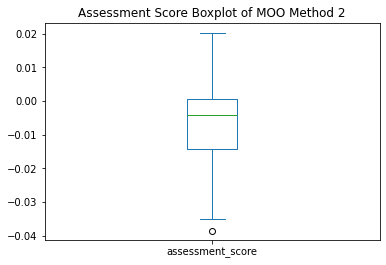

In [11]:
assessment_score_5 = res5_0_025["assessment_score"].explode().reset_index(drop=True)
assessment_score_5.plot(kind='box')
plt.title('Assessment Score Boxplot of MOO Method 2')
plt.show()